# Multi-Armed Bandit Algorithms: Epsilon-Greedy, UCB, and Thompson Sampling

This notebook implements and compares three exploration-exploitation strategies:
- Epsilon-Greedy
- UCB (Upper Confidence Bound)
- Thompson Sampling (for Bernoulli rewards)

We'll analyze each algorithm's performance in terms of reward and convergence.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def epsilon_greedy(num_arms, true_means, total_steps, epsilon):
    estimated_means = np.zeros(num_arms)
    arm_pulls = np.zeros(num_arms)
    rewards_history = []

    for step in range(total_steps):
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(num_arms)
        else:
            chosen_arm = np.argmax(estimated_means)

        reward = np.random.normal(loc=true_means[chosen_arm], scale=1.0)

        arm_pulls[chosen_arm] += 1
        estimated_means[chosen_arm] += (reward - estimated_means[chosen_arm]) / arm_pulls[chosen_arm]

        rewards_history.append(reward)

    return rewards_history


In [3]:
def ucb(num_arms, true_means, total_steps, confidence_level):
    estimated_means = np.zeros(num_arms)
    arm_pulls = np.zeros(num_arms)
    rewards_history = []

    for step in range(total_steps):
        if step < num_arms:
            chosen_arm = step
        else:
            ucb_values = estimated_means + confidence_level * np.sqrt(np.log(step + 1) / (arm_pulls + 1e-9))
            chosen_arm = np.argmax(ucb_values)

        reward = np.random.normal(loc=true_means[chosen_arm], scale=1.0)

        arm_pulls[chosen_arm] += 1
        estimated_means[chosen_arm] += (reward - estimated_means[chosen_arm]) / arm_pulls[chosen_arm]

        rewards_history.append(reward)

    return rewards_history


In [4]:
def thompson_sampling(num_arms, true_probs, total_steps):
    success_counts = np.zeros(num_arms)
    failure_counts = np.zeros(num_arms)
    rewards_history = []

    for step in range(total_steps):
        sampled_probs = np.random.beta(success_counts + 1, failure_counts + 1)
        chosen_arm = np.argmax(sampled_probs)

        reward = 1 if np.random.rand() < true_probs[chosen_arm] else 0

        if reward:
            success_counts[chosen_arm] += 1
        else:
            failure_counts[chosen_arm] += 1

        rewards_history.append(reward)

    return rewards_history


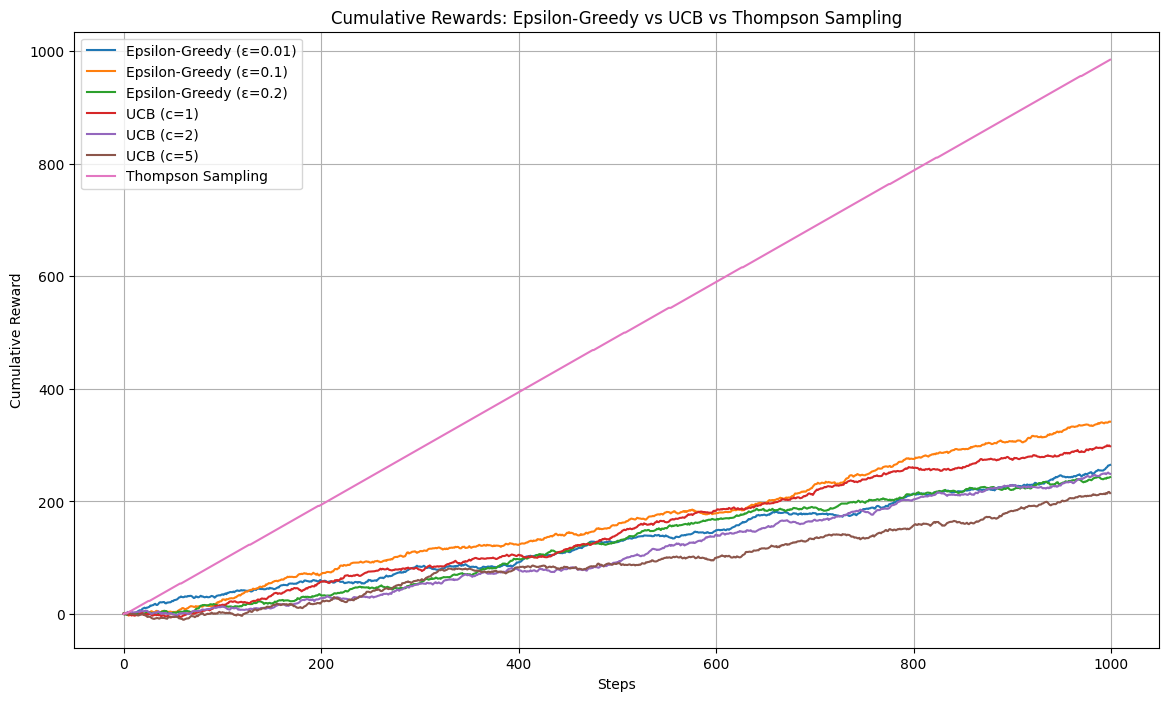

In [5]:
def run_experiments():
    num_arms = 5
    total_steps = 1000

    true_means = np.random.normal(0, 1, size=num_arms)
    true_probs = np.random.rand(num_arms)

    plt.figure(figsize=(14, 8))

    # Epsilon-Greedy Experiments
    for epsilon in [0.01, 0.1, 0.2]:
        rewards = epsilon_greedy(num_arms, true_means, total_steps, epsilon)
        plt.plot(np.cumsum(rewards), label=f"Epsilon-Greedy (ε={epsilon})")

    # UCB Experiments
    for c in [1, 2, 5]:
        rewards = ucb(num_arms, true_means, total_steps, c)
        plt.plot(np.cumsum(rewards), label=f"UCB (c={c})")

    # Thompson Sampling Experiment
    th_rewards = thompson_sampling(num_arms, true_probs, total_steps)
    plt.plot(np.cumsum(th_rewards), label="Thompson Sampling")

    plt.title("Cumulative Rewards: Epsilon-Greedy vs UCB vs Thompson Sampling")
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

run_experiments()


## 📊 Analysis

### Epsilon-Greedy
- Smaller ε focuses more on exploitation and converges faster, but may miss better arms.
- Larger ε improves exploration but slows convergence.

### UCB
- Uses confidence bounds to balance exploration and exploitation automatically.
- Parameter `c` controls exploration aggressiveness.

### Thompson Sampling
- Best suited for Bernoulli rewards.
- Bayesian approach gives strong performance and fast convergence without tuning.

### Conclusion
- **Thompson Sampling** tends to outperform others in Bernoulli settings.
- **UCB** offers a good balance without needing ε.
- **Epsilon-Greedy** is simple but requires careful tuning.
